Insira o caminho para o arquivo de dados: C:\Users\Gustavo Dalkiranis\Desktop\Programas\Curso\Projeto\iris.data
Qual a porcentagem dos dados que será usada para treinamento? (exemplo: 70 para 70%): 70

Acurácia: 1.00

Relatório de Classificação:


,precision,recall,f1-score,support
Iris-setosa,1.0,1.0,1.0,19.0
Iris-versicolor,1.0,1.0,1.0,13.0
Iris-virginica,1.0,1.0,1.0,13.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,45.0
weighted avg,1.0,1.0,1.0,45.0


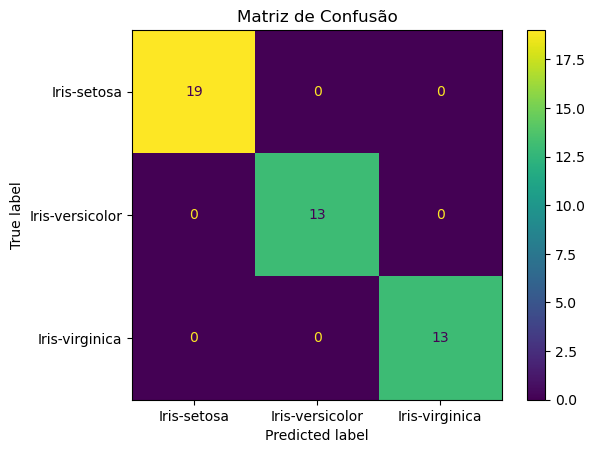

In [8]:
# Programa para classificar Iris dataset.
# Programa processa o dataset, treina, e avalia o modelo.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

class Modelo:
    def __init__(self):
        self.model = None
        self.df = None
        self.label_encoder = LabelEncoder()  # Encoder como um atributo da classe
        self.x_train, self.x_test, self.y_train, self.y_test = None, None, None, None

    def carregar_dataset(self, path):
        # Carrega o conjunto de dados a partir de um arquivo CSV.
        column_names = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']
        self.df = pd.read_csv(path, names=column_names)
        
        # Codifica a coluna 'Species' como valores numéricos
        self.df['Species'] = self.label_encoder.fit_transform(self.df['Species'])
        return self.df

    def verificando_dados(self, correlation_threshold=0.9):
        # Verificando correlação e exibindo o heatmap
        correlation_matrix = self.df.drop(columns=['Species']).corr()
        plt.figure(figsize=(8, 6))
        sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
        plt.title("Mapa de calor de correlação do Dataset Iris")
        plt.show()
        
        # Identificando colunas altamente correlacionadas
        to_remove = []
        for i in range(len(correlation_matrix.columns)):
            for j in range(i):
                if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
                    colname1 = correlation_matrix.columns[i]
                    colname2 = correlation_matrix.columns[j]
                    user_input = input(f"As colunas '{colname1}' e '{colname2}' têm uma correlação de {correlation_matrix.iloc[i, j]:.2f}. "
                                       f"Deseja remover a coluna '{colname2}'? (s/n): ")
                    if user_input.lower() == 's':
                        to_remove.append(colname2)

        # Removendo colunas conforme solicitado pelo usuário
        if to_remove:
            self.df.drop(columns=to_remove, inplace=True)
            print(f"Colunas removidas: {to_remove}")
    
    def preparar_dados(self):
        # Prepara os dados para o treinamento, dividindo-os em conjuntos de treino e teste.
        x = self.df.iloc[:, :-1]  # Características
        y = self.df.iloc[:, -1]   # Rótulos
        self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(x, y, test_size=0.3, random_state=42)
        return self.x_train, self.x_test, self.y_train, self.y_test
    
    def preparar_dados(self):
        # Pergunta ao usuário a porcentagem dos dados que será usada para treinamento
        train_percentage = input("Qual a porcentagem dos dados que será usada para treinamento? (exemplo: 70 para 70%): ")
        
        try:
            # Converte a entrada do usuário em uma proporção (por exemplo, 70% para 0.7)
            self.train_size = float(train_percentage) / 100.0
        except ValueError:
            print("Valor inválido. Usando a porcentagem padrão de 70% para treinamento.")
        
        # Prepara os dados para o treinamento, dividindo-os em conjuntos de treino e teste.
        x = self.df.iloc[:, :-1]  # Características
        y = self.df.iloc[:, -1]   # Rótulos
        self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(x, y, train_size=self.train_size, random_state=42)
        return self.x_train, self.x_test, self.y_train, self.y_test

    def treinar_modelo(self):
        # Treina um modelo de classificação SVM com os dados de treino.
        self.model = SVC(kernel='linear')
        self.model.fit(self.x_train, self.y_train)
        return self.model

    def avaliar_modelo(self):
        y_pred = self.model.predict(self.x_test)
        
        # Converte previsões e rótulos reais de volta para os nomes originais das espécies
        y_pred_labels = self.label_encoder.inverse_transform(y_pred)
        y_test_labels = self.label_encoder.inverse_transform(self.y_test)

        # Acurácia
        accuracy = accuracy_score(y_test_labels, y_pred_labels)

        # Relatório de Classificação formatado
        report = classification_report(y_test_labels, y_pred_labels, output_dict=True)
        report_df = pd.DataFrame(report).transpose()

        # Exibindo a acurácia em destaque
        print(f"\nAcurácia: {accuracy:.2f}")

        # Exibindo o relatório de classificação formatado
        print("\nRelatório de Classificação:")
        display(report_df)

        # Matriz de Confusão
        ConfusionMatrixDisplay.from_predictions(y_test_labels, y_pred_labels, display_labels=self.label_encoder.classes_)
        plt.title("Matriz de Confusão")
        plt.show()

# Input do caminho do arquivo
file_path = input("Insira o caminho para o arquivo de dados: ")    
    
# Usando o caminho especificado pelo usuário
model = Modelo()
data = model.carregar_dataset(file_path)

# Preparação, treino e avaliação do modelo
x_train, x_test, y_train, y_test = model.preparar_dados()
trained_model = model.treinar_modelo()
model.avaliar_modelo()